ADPE Ross Sea. Sum of Bird, Royds and Crozier colonies

In [1]:
# Load libraries
library(forecast); library(ggplot2);library(plyr)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
# Load the data
master<-read.csv("~/Workspace/Anthropocene/data/master_data.csv")

In [3]:
# Add sum Bird, Royds and Crozier column
master$ADPE_total <- master$ADPE_RO + master$ADPE_BIRD +master$ADPE_CROZ

In [4]:
amdl<-auto.arima(master$ADPE_total,seasonal=FALSE)
summary(amdl)


Series: master$ADPE_total 
ARIMA(0,1,0) 

sigma^2 estimated as 3.365e+09:  log likelihood=-235.71
AIC=473.41   AICc=473.63   BIC=474.41

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE     MASE       ACF1
Training set 12505.57 56540.57 41207.41 0.4270498 18.33779 1.016097 -0.5768596


In [5]:
mdl1<-Arima(master$ADPE_total,order=c(1,0,0),include.mean=F,include.drift=T)
summary(mdl1)

Series: master$ADPE_total 
ARIMA(1,0,0) with drift 

Coefficients:
         ar1      drift
      0.8148  21303.886
s.e.  0.1503   4513.828

sigma^2 estimated as 3.49e+09:  log likelihood=-247.86
AIC=501.71   AICc=503.13   BIC=504.85

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE    MASE       ACF1
Training set 8332.482 56044.84 41497.08 0.5822076 19.23801 1.02324 -0.3287519



	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with drift
Q* = 2.478, df = 3, p-value = 0.4793

Model df: 2.   Total lags used: 5



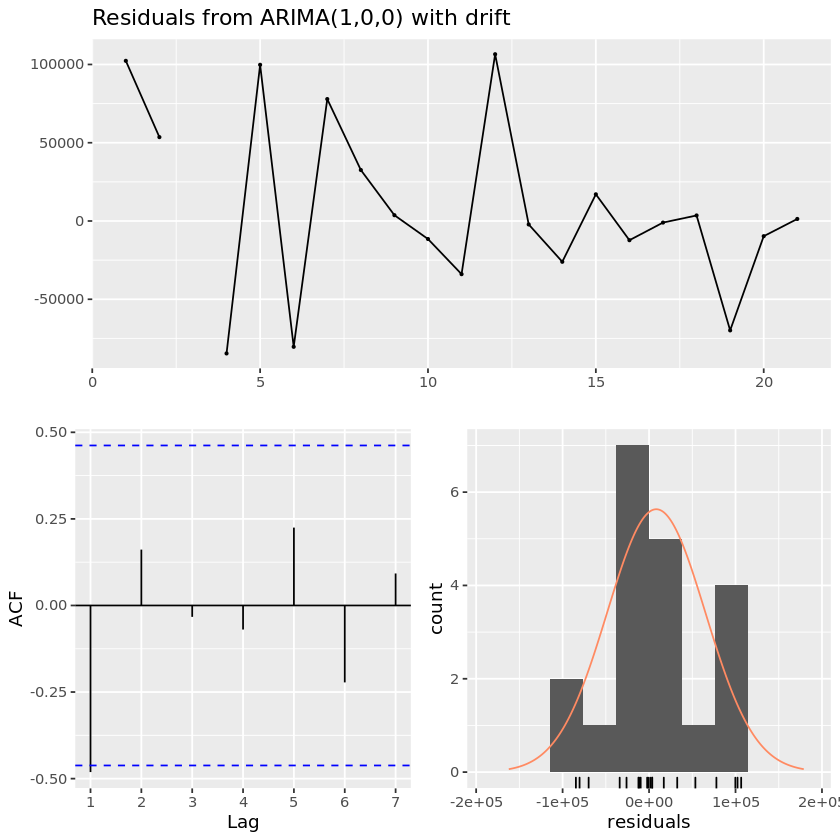

In [6]:
checkresiduals(mdl1)

In [7]:
mdl2<-Arima(master$ADPE_total,order=c(2,0,0),include.mean=F,include.drift=T)
summary(mdl2)

Series: master$ADPE_total 
ARIMA(2,0,0) with drift 

Coefficients:
         ar1     ar2      drift
      0.5500  0.4063  14710.028
s.e.  0.2004  0.2178   8654.806

sigma^2 estimated as 3.083e+09:  log likelihood=-246.6
AIC=501.19   AICc=503.69   BIC=505.37

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set 4992.051 51195.27 40336.58 -2.022535 18.62568 0.9946238 -0.2046482



	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with drift
Q* = 2.4598, df = 3, p-value = 0.4826

Model df: 3.   Total lags used: 6



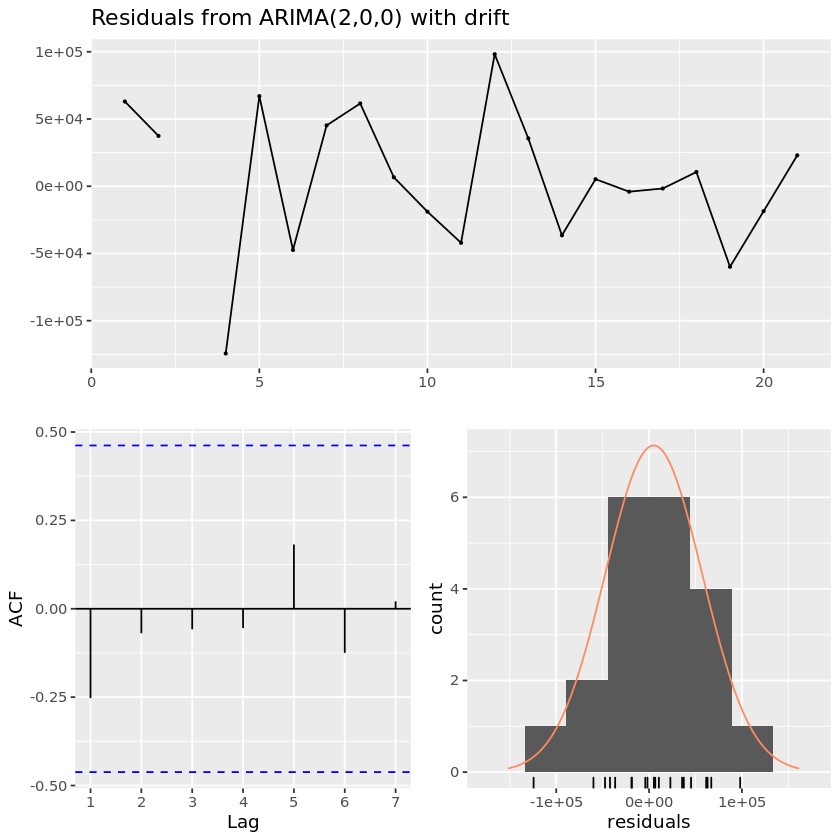

In [8]:
checkresiduals(mdl2)

In [9]:
mdl3<-Arima(master$ADPE_total,order=c(2,0,1),include.mean=F,include.drift=T)
summary(mdl3)

Series: master$ADPE_total 
ARIMA(2,0,1) with drift 

Coefficients:
         ar1      ar2      ma1      drift
      1.1939  -0.1939  -0.9797  13176.773
s.e.  0.2313   0.2313   0.0929   1988.447

sigma^2 estimated as 2.458e+09:  log likelihood=-244.76
AIC=499.52   AICc=503.52   BIC=504.74

Training set error measures:
                   ME    RMSE      MAE       MPE     MAPE      MASE        ACF1
Training set 2455.988 44347.9 34699.87 -3.423565 16.43119 0.8556332 -0.08488995



	Ljung-Box test

data:  Residuals from ARIMA(2,0,1) with drift
Q* = 1.0455, df = 3, p-value = 0.7903

Model df: 4.   Total lags used: 7



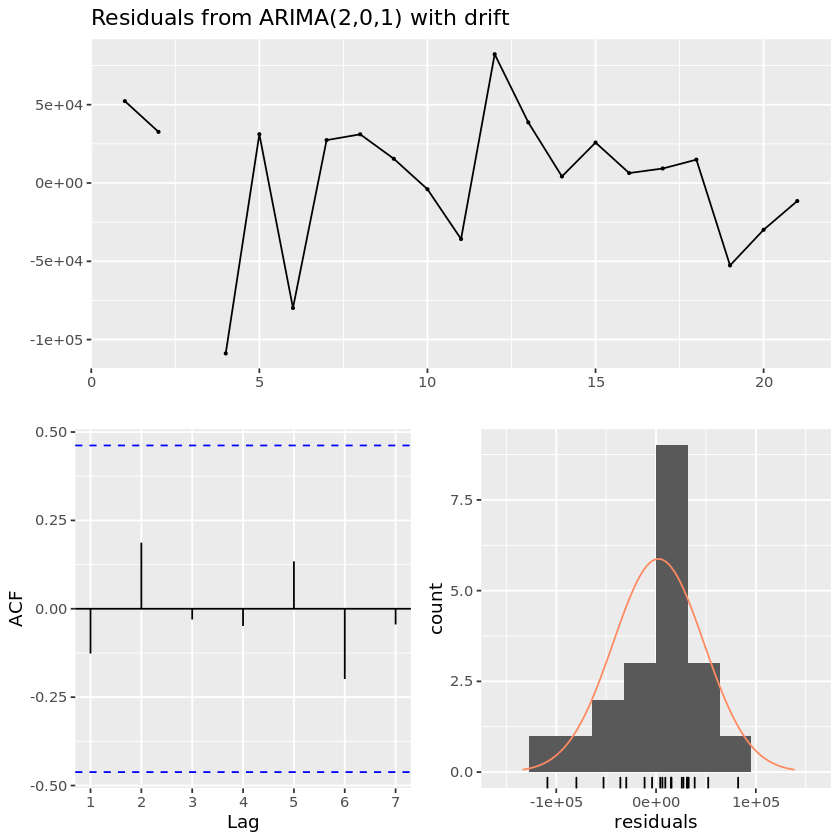

In [10]:
checkresiduals(mdl3)

In [11]:
mdl4<-Arima(master$ADPE_total,order=c(3,0,0),include.mean=F,include.drift=T)
summary(mdl4)

Series: master$ADPE_total 
ARIMA(3,0,0) with drift 

Coefficients:
         ar1     ar2     ar3      drift
      0.4476  0.2208  0.3073  12401.981
s.e.  0.2133  0.2820  0.2509   6442.187

sigma^2 estimated as 2.985e+09:  log likelihood=-245.84
AIC=501.67   AICc=505.67   BIC=506.89

Training set error measures:
                   ME     RMSE     MAE      MPE     MAPE      MASE       ACF1
Training set 4378.417 48864.31 37835.8 -2.44962 17.96021 0.9329593 -0.1115375



	Ljung-Box test

data:  Residuals from ARIMA(3,0,0) with drift
Q* = 2.3252, df = 3, p-value = 0.5077

Model df: 4.   Total lags used: 7



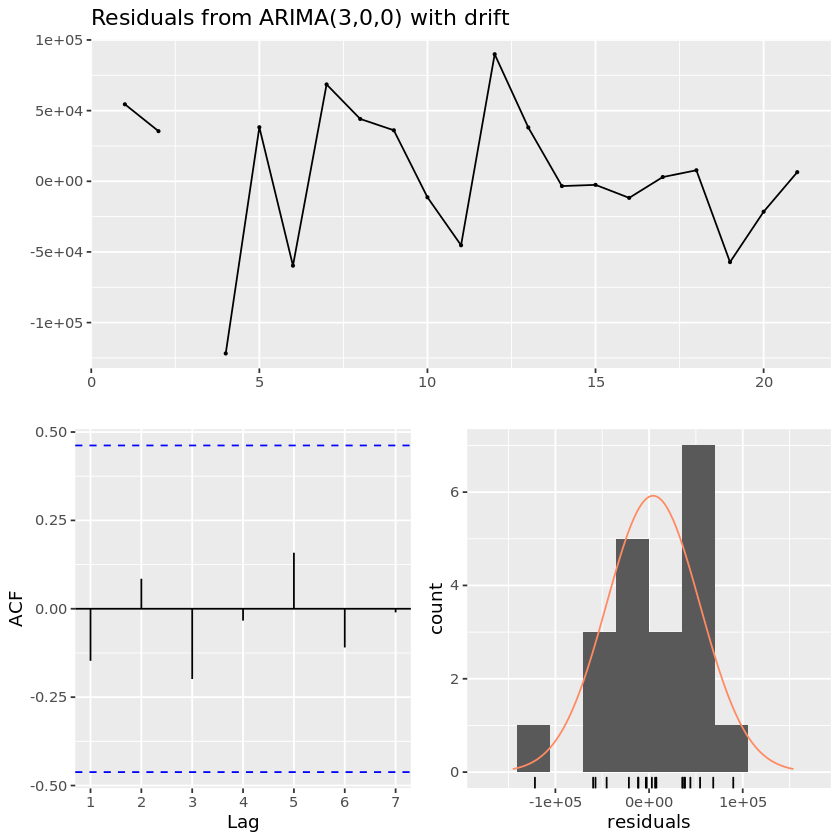

In [12]:
checkresiduals(mdl4)

# Plotting the corrected trend

In [14]:
adcroz<-master$ADPE_total
names(adcroz)<-master$year

Warning message:
“Removed 1 rows containing missing values (geom_point).”


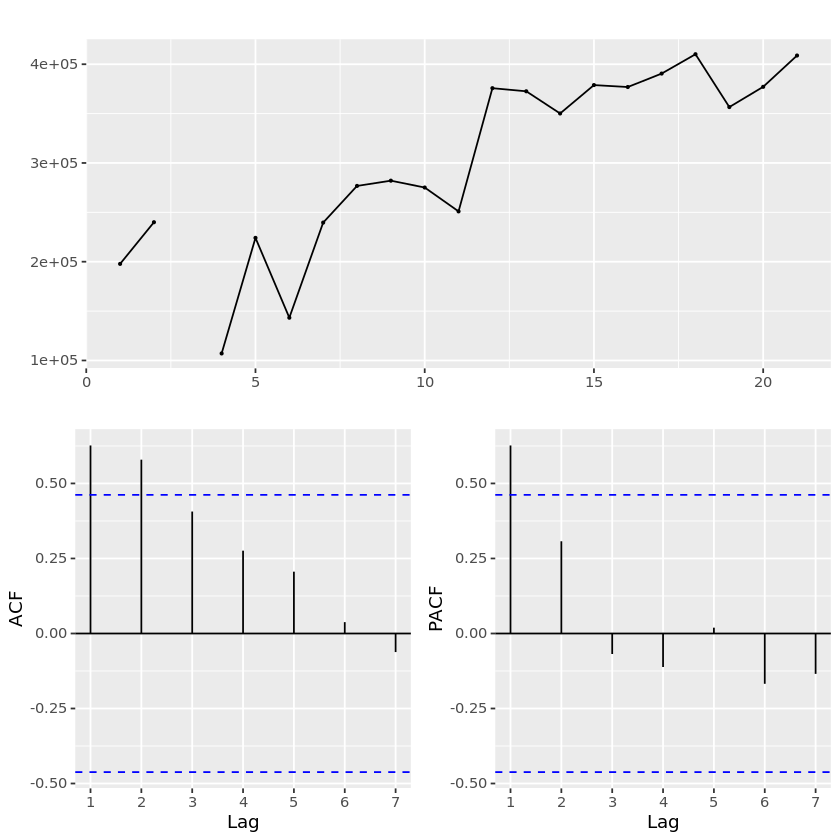

In [15]:
# Uncorrected trend
ggtsdisplay(adcroz)

Warning message:
“Removed 1 rows containing missing values (geom_point).”


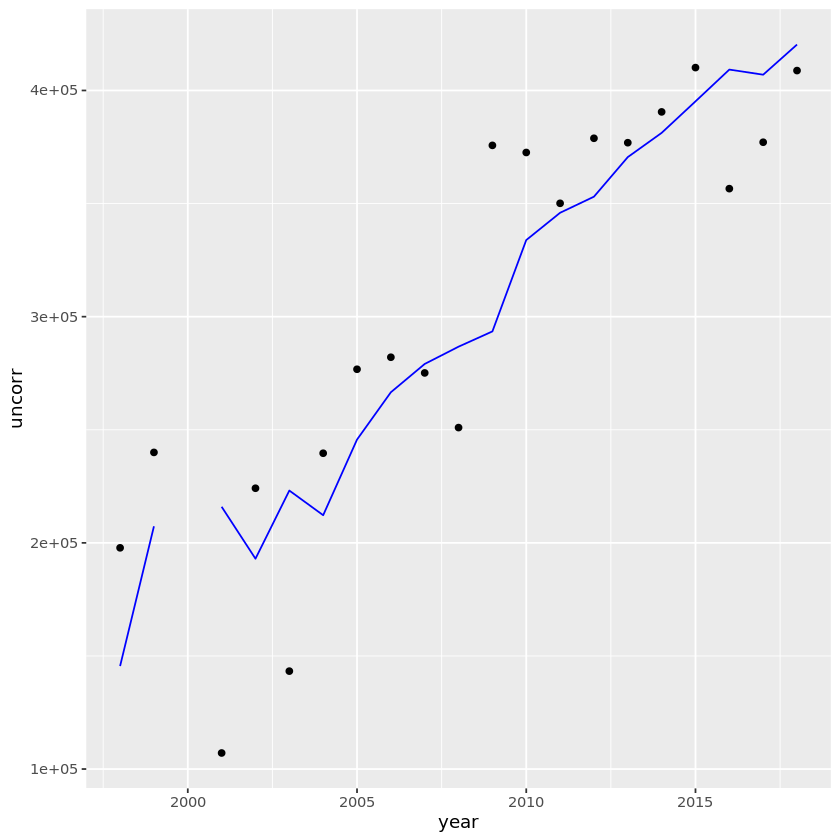

In [16]:
pdf<-data.frame(year=master$year,uncorr=mdl3$x,corr=fitted(mdl3))

ggplot(pdf,aes(x=year,y=uncorr)) + geom_point() + geom_line(aes(y=corr),color="blue")